In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import texthero as hero
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv('data\\text_combined.csv')
df.head()
df['sentiment'].value_counts()

depression    21161
anxiety       19952
lonely        11514
neutral        8638
worry          8459
happiness      5209
sadness        5165
love           3842
surprise       2187
fun            1776
relief         1526
hate           1323
empty           827
enthusiasm      759
boredom         179
anger           110
Name: sentiment, dtype: int64

In [54]:
from texthero import preprocessing

custom_pipeline = [preprocessing.lowercase,
                   preprocessing.remove_urls,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_stopwords,
                   preprocessing.remove_diacritics]

custom_pipeline

[<function texthero.preprocessing.lowercase(input: pandas.core.series.Series) -> pandas.core.series.Series>,
 <function texthero.preprocessing.remove_urls(s: pandas.core.series.Series) -> pandas.core.series.Series>,
 <function texthero.preprocessing.remove_punctuation(input: pandas.core.series.Series) -> pandas.core.series.Series>,
 <function texthero.preprocessing.remove_stopwords(input: pandas.core.series.Series, stopwords: Optional[Set[str]] = None, remove_str_numbers=False) -> pandas.core.series.Series>,
 <function texthero.preprocessing.remove_diacritics(input: pandas.core.series.Series) -> pandas.core.series.Series>]

In [55]:
df['clean'] = df['content'].pipe(hero.clean, custom_pipeline)
df.head()

,content,sentiment,clean
0,aa hth here cheerful merry new year peep waana...,lonely,aa hth cheerful merry new year peep waana get...
1,aaaa help keep trying talk boy sits close lunc...,anxiety,aaaa help keep trying talk boy sits close lunc...
2,aaaaaaaaa cant fucking cry want cry eye wont l...,depression,aaaaaaaaa cant fucking cry want cry eye wont l...
3,aaaaaaaaaaaaaaaaaaaaaah wish didnt act fake en...,depression,aaaaaaaaaaaaaaaaaaaaaah wish didnt act fake en...
4,aaaaaaaaaahhhhhhh feel like fault feel like fa...,anxiety,aaaaaaaaaahhhhhhh feel like fault feel like fa...


In [57]:
unique_values = df['sentiment'].unique().tolist()
unique_values

['lonely',
 'anxiety',
 'depression',
 'empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'happiness',
 'boredom',
 'relief',
 'anger']

In [58]:
df_copy = df.copy()

In [60]:
df['sentiment'] = df['sentiment'].replace('worry', 'anxiety')
df['sentiment'] = df['sentiment'].replace('sadness', 'depression')
df['sentiment'] = df['sentiment'].replace('love', 'happiness')
df['sentiment'] = df['sentiment'].replace('fun', 'happiness')
df['sentiment'] = df['sentiment'].replace('enthusiasm', 'happiness')
df = df[df['sentiment'] != 'anger']
df = df[df['sentiment'] != 'hate']
df = df[df['sentiment'] != 'relief']
df = df[df['sentiment'] != 'boredom']
df = df[df['sentiment'] != 'surprise']
df = df[df['sentiment'] != 'empty']
unique_values = df['sentiment'].unique().tolist()
unique_values

['lonely', 'anxiety', 'depression', 'happiness', 'neutral']

In [61]:

for i in unique_values:
    
    df_selected = df[df['sentiment']==i]
    
    print(i)
    print(hero.top_words(df_selected['clean']).head(12))


lonely
im        20493
friend    14462
like      12746
feel      12304
dont      11367
people     9767
know       8178
want       7901
one        6859
time       6643
really     6629
life       6213
Name: clean, dtype: int64
anxiety
im         38877
anxiety    29624
like       23675
feel       20613
get        17053
dont       15881
know       15052
time       13482
really     12018
day        10487
thing       9789
go          9773
Name: clean, dtype: int64
depression
im        44645
feel      27439
like      27051
dont      26779
know      18791
want      18239
life      16329
get       15883
time      14952
even      12595
cant      12469
really    11911
Name: clean, dtype: int64
happiness
day       1576
love      1117
good      1061
happy     1055
lol        658
quot       650
like       559
thanks     546
great      531
today      499
u          498
get        480
Name: clean, dtype: int64
neutral
day      416
quot     386
get      372
go       372
good     359
like     338
work  

In [62]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['label'] = labelencoder.fit_transform(df['sentiment'])
df[['sentiment','label']].drop_duplicates(keep='first')
df

,content,sentiment,clean,label
0,aa hth here cheerful merry new year peep waana...,lonely,aa hth cheerful merry new year peep waana get...,3
1,aaaa help keep trying talk boy sits close lunc...,anxiety,aaaa help keep trying talk boy sits close lunc...,0
2,aaaaaaaaa cant fucking cry want cry eye wont l...,depression,aaaaaaaaa cant fucking cry want cry eye wont l...,1
3,aaaaaaaaaaaaaaaaaaaaaah wish didnt act fake en...,depression,aaaaaaaaaaaaaaaaaaaaaah wish didnt act fake en...,1
4,aaaaaaaaaahhhhhhh feel like fault feel like fa...,anxiety,aaaaaaaaaahhhhhhh feel like fault feel like fa...,0
...,...,...,...,...
92622,@JohnLloydTaylor,neutral,johnlloydtaylor,4
92623,Happy Mothers Day All my love,happiness,happy mothers day love,2
92624,Happy Mother's Day to all the mommies out ther...,happiness,happy mother day mommies woman man ...,2
92625,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,happiness,niariley wassup beautiful follow peep n...,2


In [64]:
unique_values = ['anxiety', 
                 'depression',
                 'happiness',
                 'lonely',
                 'neutral']

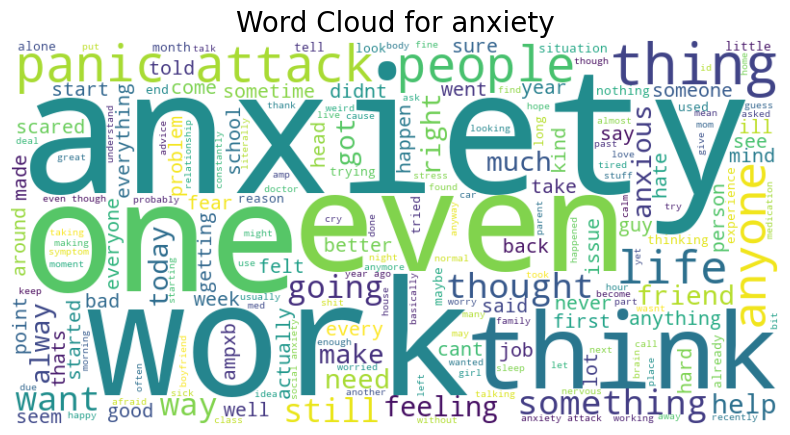

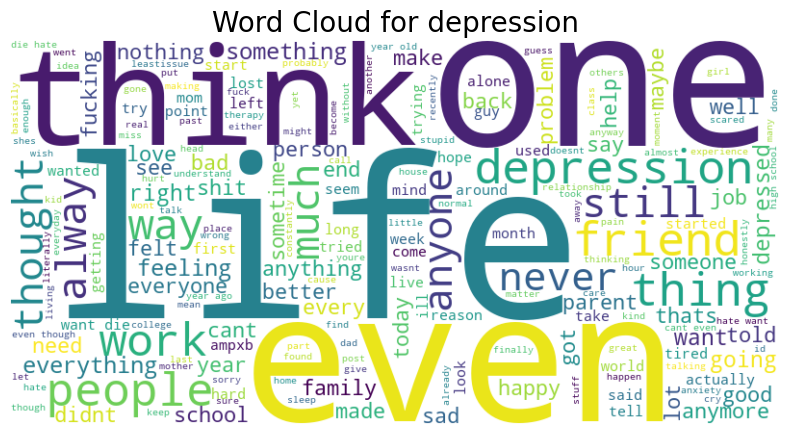

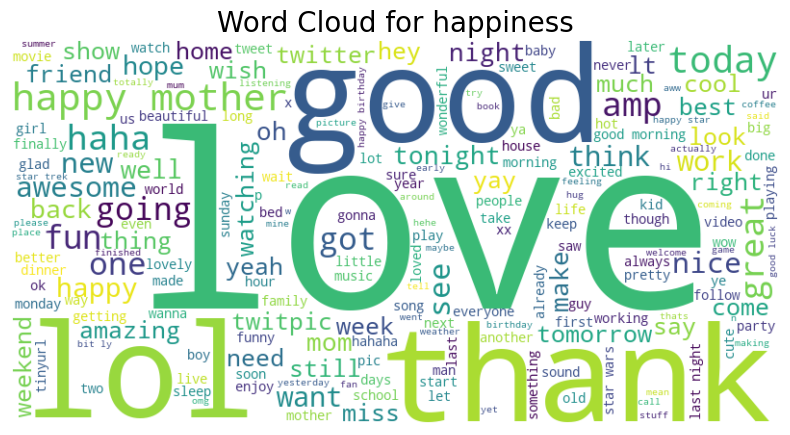

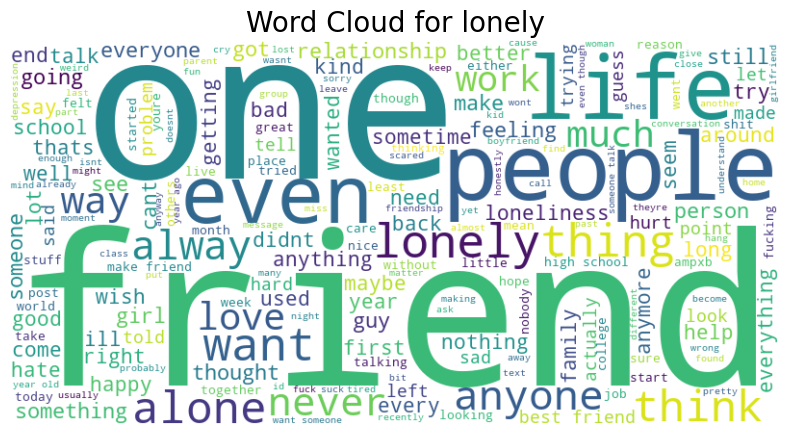

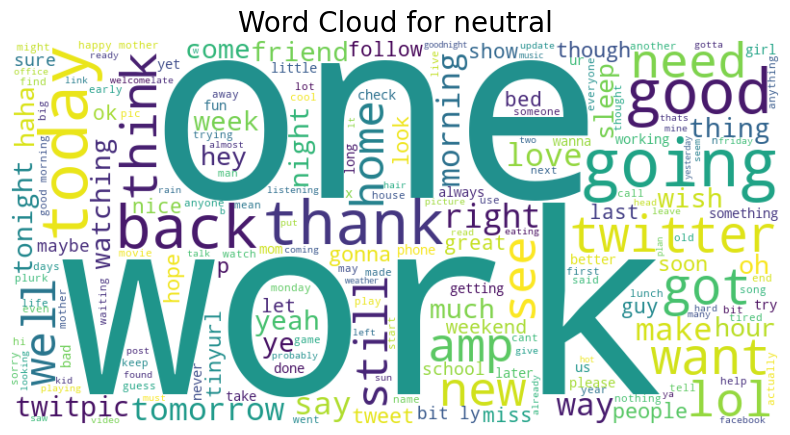

Top words for anxiety:
anxiety    29624
is         16415
that       15961
thing       9789
cant        9642
want        9596
even        9228
going       9207
year        8851
people      8621
help        8094
work        8060
Name: clean, dtype: int64

Top words for depression:
want          18237
is            16886
that          16585
life          16327
cant          12676
even          12593
year          11847
friend        11771
people        11460
thing         11171
one           10535
depression    10338
Name: clean, dtype: int64

Top words for happiness:
i      4933
to     4002
the    3949
a      3041
you    2509
my     2205
and    2192
for    1736
it     1683
is     1496
in     1441
of     1322
Name: clean, dtype: int64

Top words for lonely:
friend     14462
people      9767
want        7901
one         6859
is          6621
that        6618
life        6213
lonely      6091
someone     5817
talk        5663
even        5484
year        5246
Name: clean, dtype: int64

Top 

In [65]:
import pandas as pd
import re
import texthero as hero
from texthero import preprocessing

# Load the dataset
data = df

# Define stop words (you can also use a more comprehensive list of stop words)
stop_words = set(["im", "dont", "ive", "get", "like", "know", "time", "feel", "really", "day", "go", "u", "quot"])

# Custom pipeline for cleaning and removing stop words
custom_pipeline = [
    preprocessing.fillna,
    preprocessing.lowercase,
    preprocessing.remove_digits,
    preprocessing.remove_punctuation,
    preprocessing.remove_diacritics,
    preprocessing.remove_whitespace,
    preprocessing.remove_stopwords,
    lambda x: x.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
]

# Apply the custom pipeline to clean the text
data['clean'] = hero.clean(data['content'], custom_pipeline)

# Define labels
labels = {i: value for i, value in enumerate(unique_values)}

# Function to generate and display a word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_cloud(text_series, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_series))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Plot word clouds for each label
for label, label_name in labels.items():
    label_data = data[data['label'] == label]
    plot_word_cloud(label_data['clean'], f"Word Cloud for {label_name}")

# Function to clean the text more thoroughly, including removing apostrophes
def clean_text_thoroughly(text):
    text = re.sub(r"[^a-zA-Z\s]", '', text).lower()  # Remove non-alphabetic characters and convert to lowercase
    return text

# Apply thorough text cleaning
data['clean'] = data['content'].apply(clean_text_thoroughly)

# Remove stop words from the clean text again
data['clean'] = data['clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Filter and visualize top words for each label
for label, label_name in labels.items():
    label_data = data[data['label'] == label]
    top_words = hero.top_words(label_data['clean']).head(12)
    print(f"Top words for {label_name}:\n{top_words}\n")


In [66]:
import pandas as pd
import texthero as hero
from texthero import preprocessing
import re

# Load the dataset
data = df

# Define stop words (you can also use a more comprehensive list of stop words)
stop_words = set(["im", "dont", "ive", "get", "like", "know", "time", "feel", "really", "day", "go", "u", "quot"])

# Custom pipeline for cleaning and removing stop words
custom_pipeline = [
    preprocessing.fillna,
    preprocessing.lowercase,
    preprocessing.remove_digits,
    preprocessing.remove_punctuation,
    preprocessing.remove_diacritics,
    preprocessing.remove_whitespace,
    preprocessing.remove_stopwords,
    lambda x: x.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
]

# Apply the custom pipeline to clean the text
data['clean'] = hero.clean(data['content'], custom_pipeline)

# Filter the data for each label and visualize the top words

for label, label_name in labels.items():
    label_data = data[data['label'] == label]
    top_words = hero.top_words(label_data['clean']).head(12)
    print(f"Top words for {label_name}:\n{top_words}\n")


Top words for anxiety:
anxiety    29624
thing       9789
want        9597
cant        9285
even        9228
going       9209
year        8851
people      8624
help        8097
work        8072
think       7859
one         7779
Name: clean, dtype: int64

Top words for depression:
want          18239
life          16329
even          12595
cant          12469
year          11847
friend        11779
people        11463
thing         11174
one           10547
depression    10338
think          8792
make           8689
Name: clean, dtype: int64

Top words for happiness:
love      1117
good      1061
happy     1055
lol        658
http       625
thanks     546
great      531
today      499
com        472
got        465
fun        456
mother     453
Name: clean, dtype: int64

Top words for lonely:
friend     14462
people      9767
want        7901
one         6859
life        6213
lonely      6091
someone     5817
talk        5663
even        5484
year        5246
alone       5083
make        

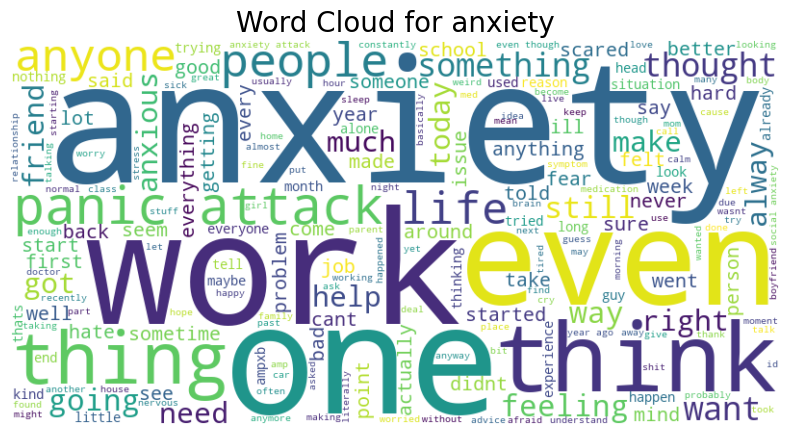

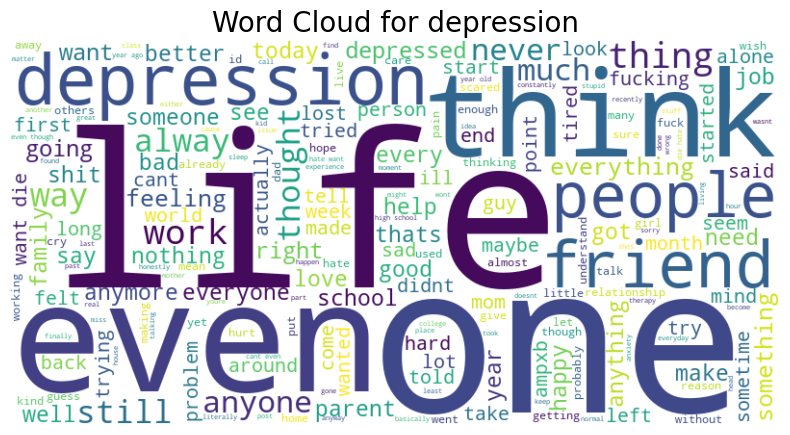

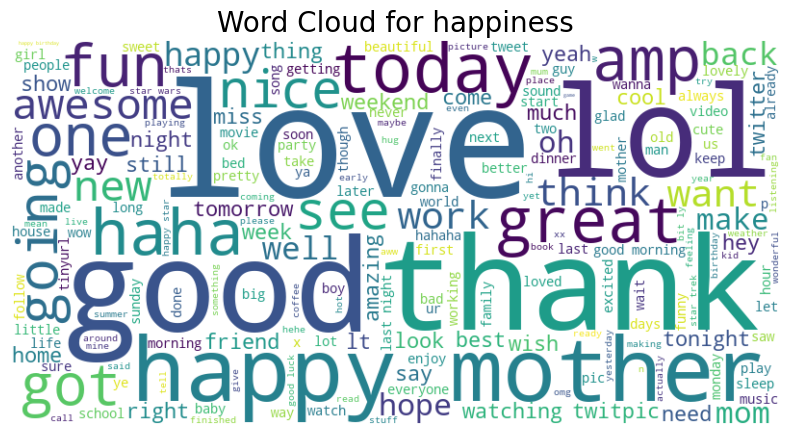

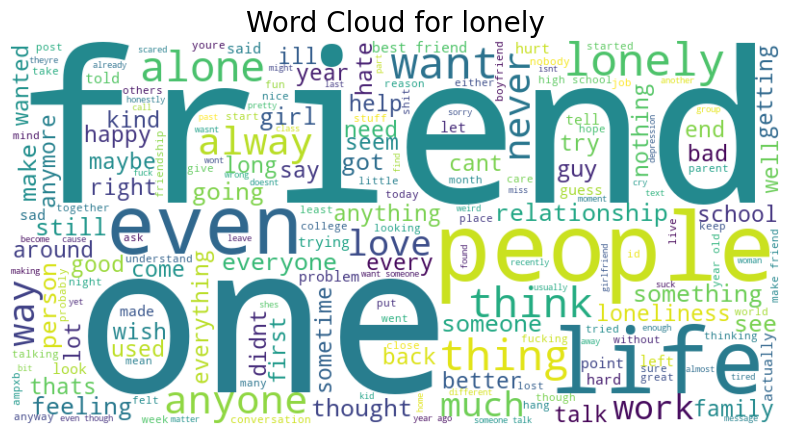

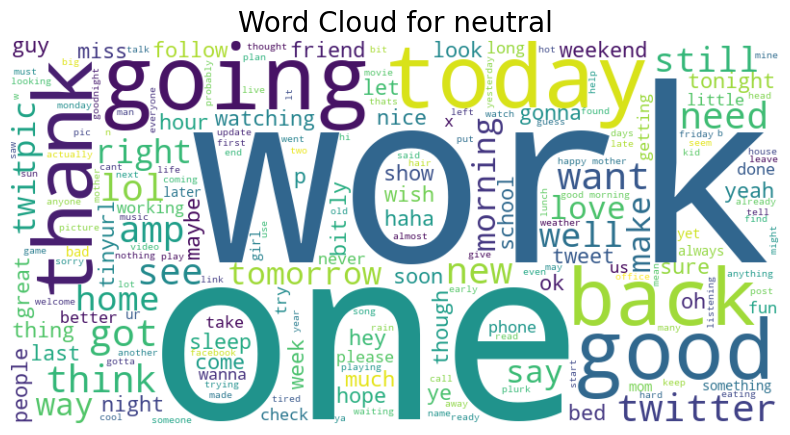

In [67]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to generate and display a word cloud
def plot_word_cloud(text_series, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(text_series))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Plot word clouds for each label
for label, label_name in labels.items():
    label_data = data[data['label'] == label]
    plot_word_cloud(label_data['clean'], f"Word Cloud for {label_name}")


In [68]:
data.to_csv("text_final.csv", index=False)

In [69]:
data['sentiment'].value_counts()

anxiety       28411
depression    26326
happiness     11586
lonely        11514
neutral        8638
Name: sentiment, dtype: int64

In [75]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

df_balancing = data
# Display initial class counts
print("Initial class counts:")
print(df_balancing['sentiment'].value_counts())

# Preprocessing: Encode sentiment labels to numerical values
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Undersample majority classes to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(df[['content']], df['sentiment_encoded'])

# Create balanced DataFrame
balanced_df = pd.DataFrame({'content': X_resampled.squeeze(), 'sentiment_encoded': y_resampled})

# Inverse transform sentiment labels for readability
balanced_df['sentiment'] = label_encoder.inverse_transform(balanced_df['sentiment_encoded'])

# Display balanced class counts
print("\nBalanced class counts:")
print(balanced_df['sentiment'].value_counts())

balanced_df.to_csv("text_final_undersampled.csv", index=False)

Initial class counts:
anxiety       28411
depression    26326
happiness     11586
lonely        11514
neutral        8638
Name: sentiment, dtype: int64

Balanced class counts:
anxiety       8638
depression    8638
happiness     8638
lonely        8638
neutral       8638
Name: sentiment, dtype: int64
